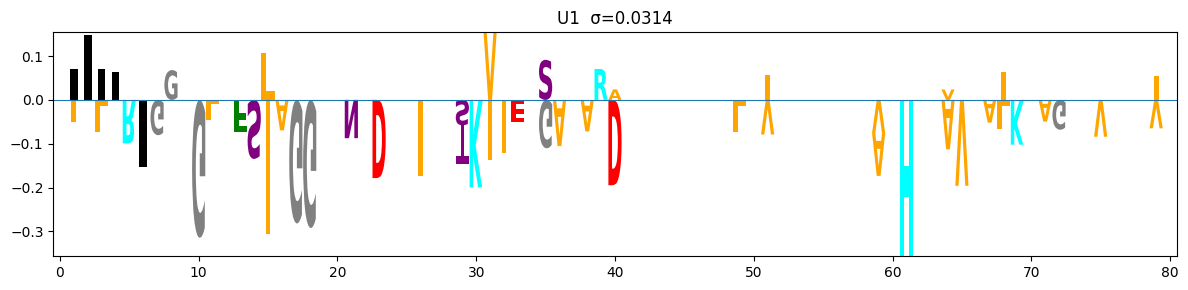

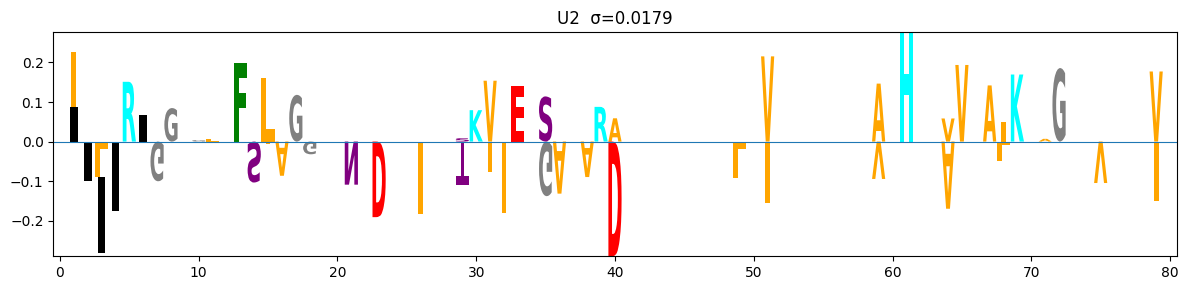

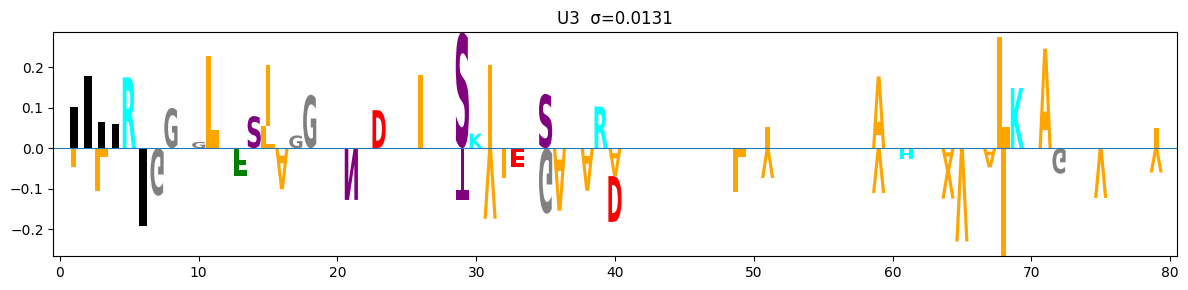

/home/jboccato/.pyenv/versions/data-env/lib/python3.12/site-packages/logomaker/src/Logo.py:1001: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


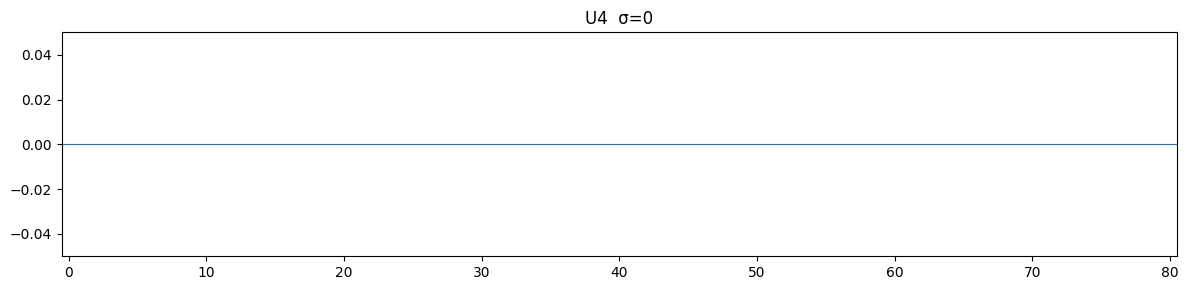

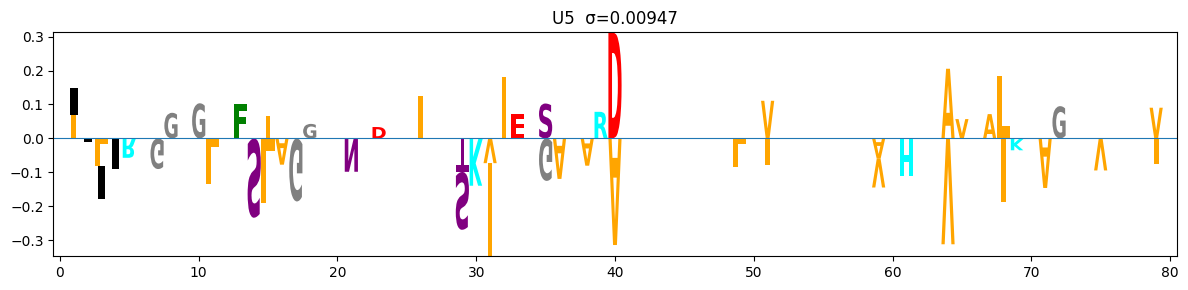

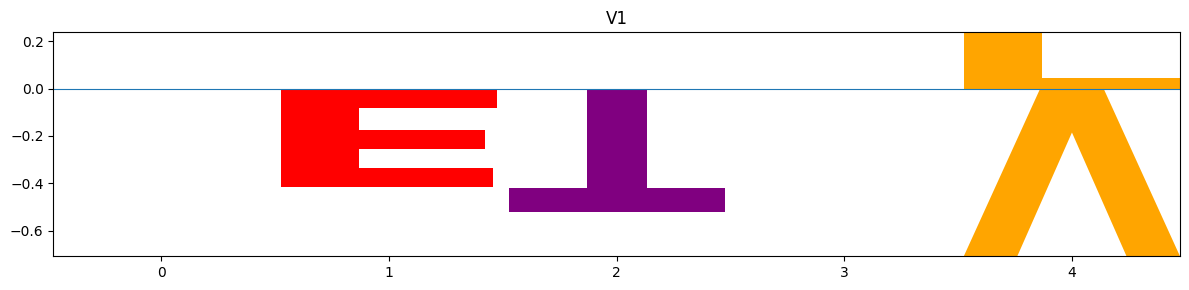

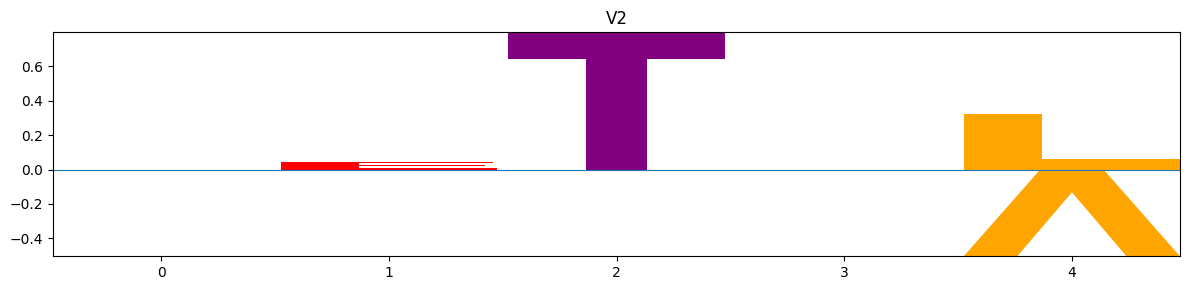

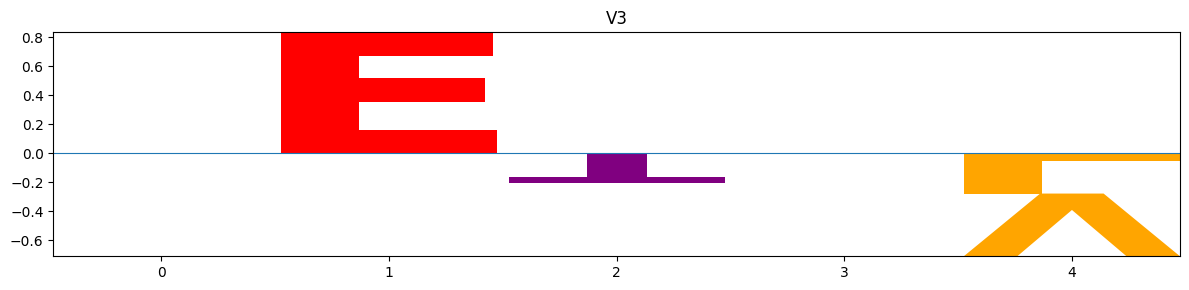

/home/jboccato/.pyenv/versions/data-env/lib/python3.12/site-packages/logomaker/src/Logo.py:1001: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


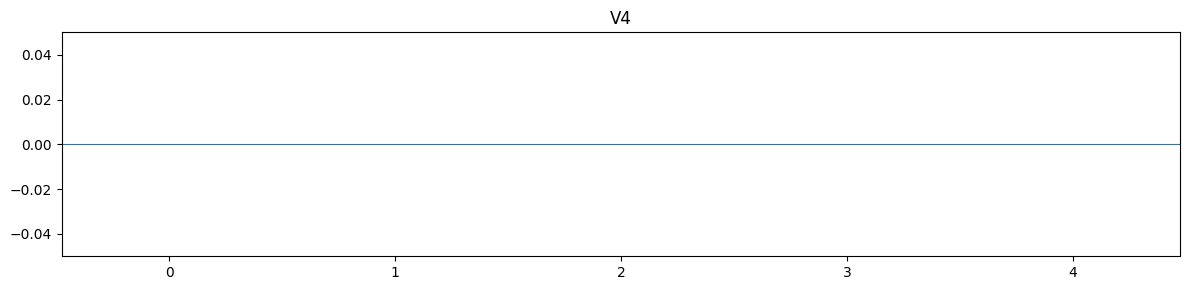

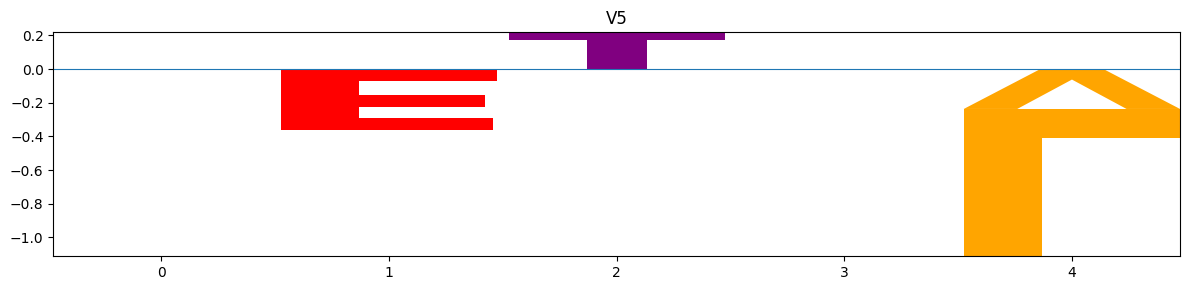

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logomaker as lm

data = np.load("sparse_svd_center_top5.npz", allow_pickle=True)
U = data["U"]
V = data["V"]
S = data["S"]

alphabet = list("ACDEFGHIKLMNPQRSTVWY-")  # must match your encoding order

color_dict = {
    'A': "orange", 'V': "orange", 'L': "orange", 'I': "orange", 'M': "orange",
    'F': "green",  'Y': "green",  'W': "green",
    'H': "cyan",   'K': "cyan",   'R': "cyan",
    'D': "red",    'E': "red",
    'S': "purple", 'T': "purple", 'N': "purple", 'Q': "purple",
    'C': "pink",   'G': "gray",   'P': "magenta",
    '-': "black"
}

def sparsify_topn(M, topn=4):
    Ms = np.zeros_like(M)
    for j in range(M.shape[1]):
        col = M[:, j]
        idx = np.argsort(np.abs(col))[::-1][:topn]
        Ms[idx, j] = col[idx]
    return Ms

def plot_one_logo(mat_21xL, title, window=(0, 200), topn=4):
    M = np.array(mat_21xL, copy=True)

    if window is not None:
        start, end = window
        start = max(0, int(start))
        end = min(M.shape[1], int(end))
        M = M[:, start:end]

    if topn is not None:
        M = sparsify_topn(M, topn=topn)

    df = pd.DataFrame(M.T, columns=alphabet)

    fig, ax = plt.subplots(figsize=(12, 3))
    logo = lm.Logo(df, ax=ax)

    # ✅ correct API for per-letter colors
    logo.style_glyphs(color_scheme=color_dict)

    ax.axhline(0, linewidth=0.8)
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

WINDOW = (0, 200)
TOPN = 4
k = min(5, U.shape[0], V.shape[0], S.shape[0])

for i in range(k):
    plot_one_logo(U[i], f"U{i+1}  σ={S[i]:.3g}", window=WINDOW, topn=TOPN)

for i in range(k):
    plot_one_logo(V[i], f"V{i+1}", window=WINDOW, topn=TOPN)


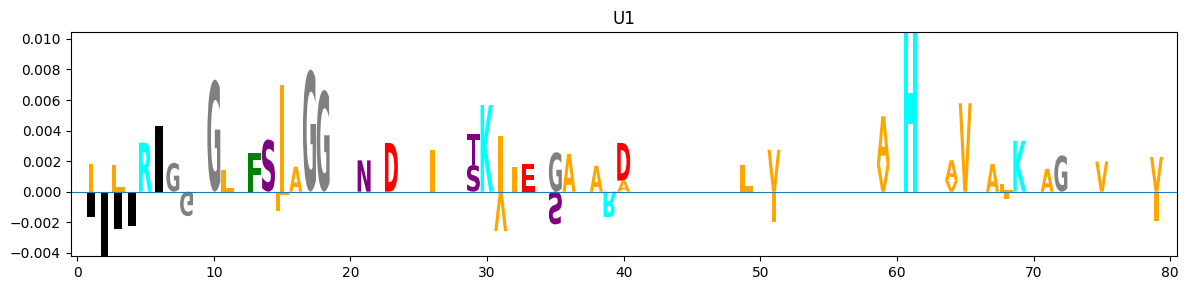

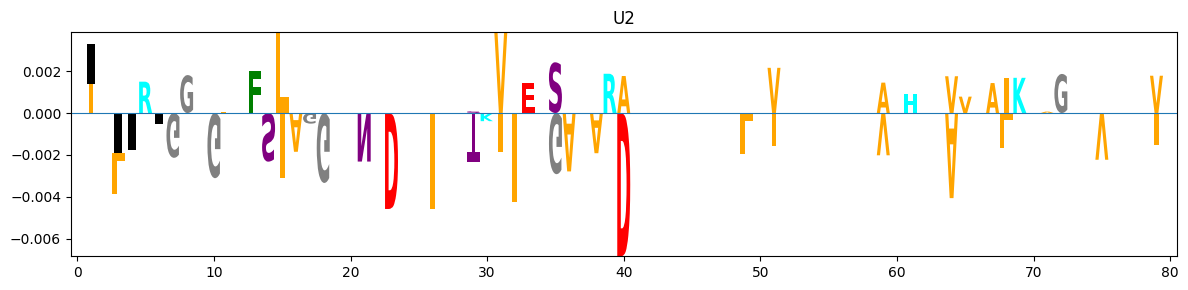

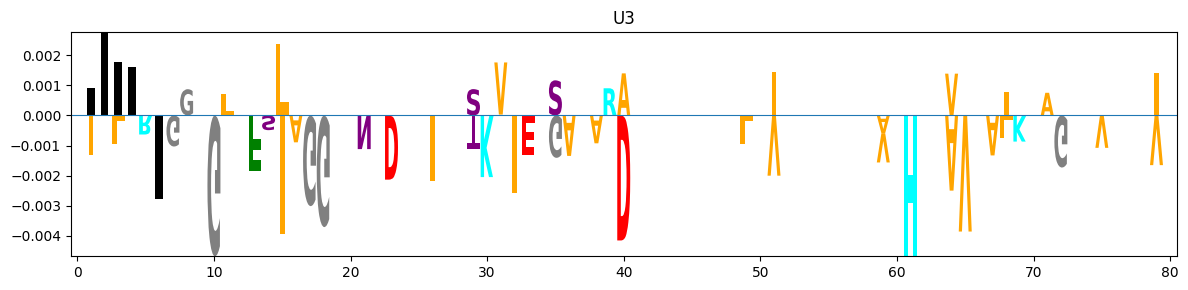

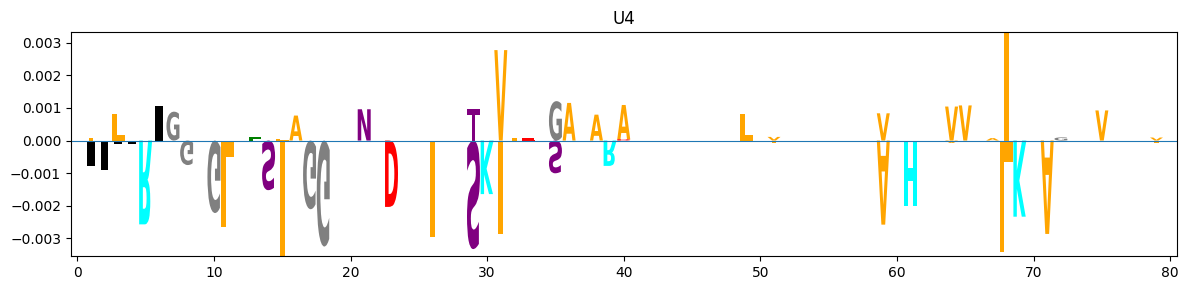

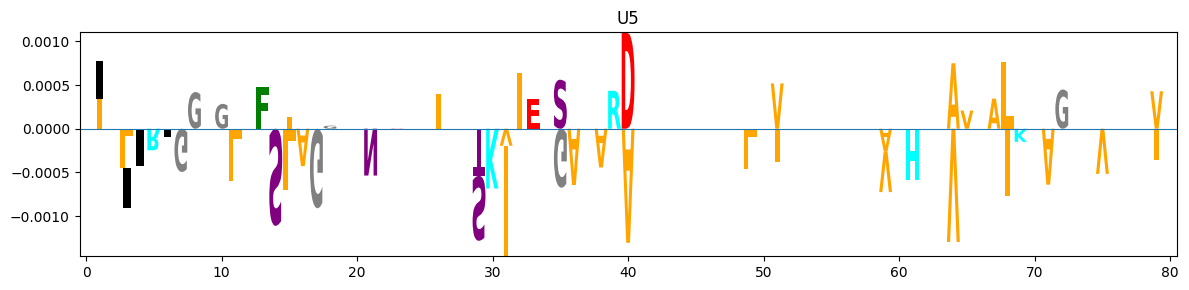

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logomaker as lm

data = np.load("U_cols_top5.npz", allow_pickle=True)

U = [data[f"U{i}"] for i in range(1, 6) if f"U{i}" in data.files]
S = data["S"] if "S" in data.files else None

alphabet = list("ACDEFGHIKLMNPQRSTVWY-")  # must match your encoding order

color_dict = {
    'A': "orange", 'V': "orange", 'L': "orange", 'I': "orange", 'M': "orange",
    'F': "green",  'Y': "green",  'W': "green",
    'H': "cyan",   'K': "cyan",   'R': "cyan",
    'D': "red",    'E': "red",
    'S': "purple", 'T': "purple", 'N': "purple", 'Q': "purple",
    'C': "pink",   'G': "gray",   'P': "magenta",
    '-': "black"
}

def sparsify_topn(M, topn=4):
    Ms = np.zeros_like(M)
    for j in range(M.shape[1]):
        col = M[:, j]
        idx = np.argsort(np.abs(col))[::-1][:topn]
        Ms[idx, j] = col[idx]
    return Ms

def plot_one_logo(mat_21xL, title, window=(0, 200), topn=4):
    M = np.array(mat_21xL, copy=True)

    if window is not None:
        start, end = window
        start = max(0, int(start))
        end = min(M.shape[1], int(end))
        M = M[:, start:end]

    if topn is not None:
        M = sparsify_topn(M, topn=topn)

    df = pd.DataFrame(M.T, columns=alphabet)

    fig, ax = plt.subplots(figsize=(12, 3))
    logo = lm.Logo(df, ax=ax)
    logo.style_glyphs(color_scheme=color_dict)

    ax.axhline(0, linewidth=0.8)
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

WINDOW = (0, 200)
TOPN = 4
k = min(5, len(U), len(S) if S is not None else 5)

for i in range(k):
    title = f"U{i+1}" if S is None else f"U{i+1}  σ={S[i]:.3g}"
    plot_one_logo(U[i], title, window=WINDOW, topn=TOPN)


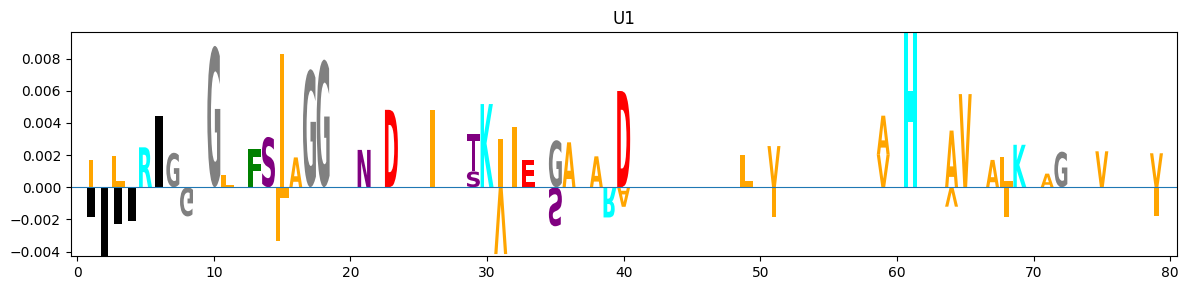

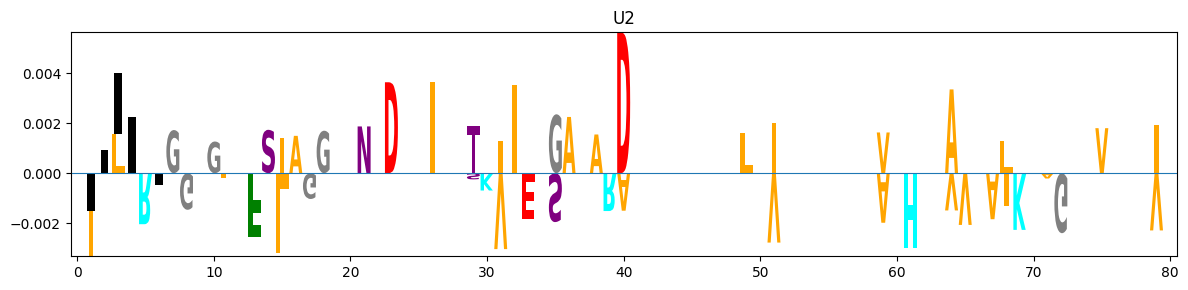

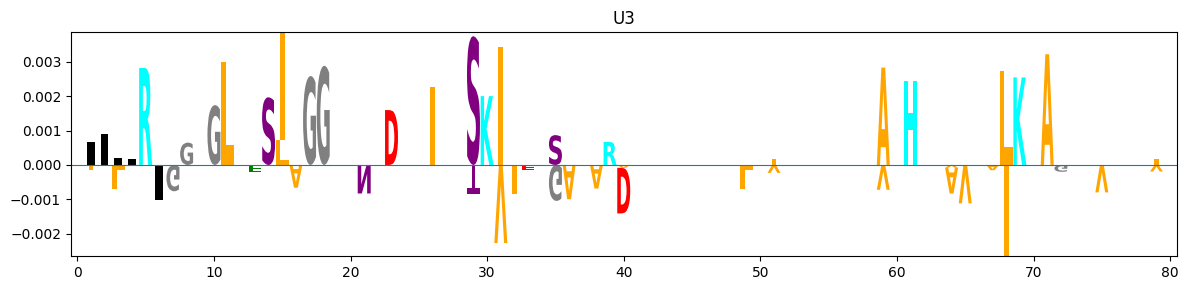

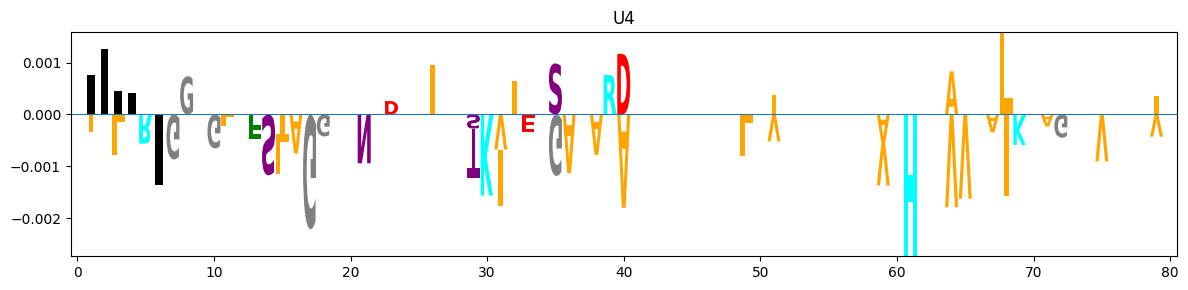

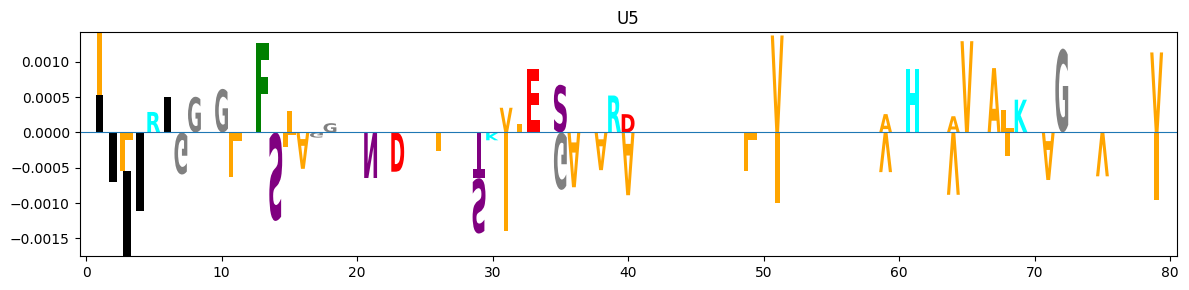

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logomaker as lm

data = np.load("U_cols_PC5.npz", allow_pickle=True)

U = [data[f"U{i}"] for i in range(1, 6) if f"U{i}" in data.files]
S = data["S"] if "S" in data.files else None

alphabet = list("ACDEFGHIKLMNPQRSTVWY-")  # must match your encoding order

color_dict = {
    'A': "orange", 'V': "orange", 'L': "orange", 'I': "orange", 'M': "orange",
    'F': "green",  'Y': "green",  'W': "green",
    'H': "cyan",   'K': "cyan",   'R': "cyan",
    'D': "red",    'E': "red",
    'S': "purple", 'T': "purple", 'N': "purple", 'Q': "purple",
    'C': "pink",   'G': "gray",   'P': "magenta",
    '-': "black"
}

def sparsify_topn(M, topn=4):
    Ms = np.zeros_like(M)
    for j in range(M.shape[1]):
        col = M[:, j]
        idx = np.argsort(np.abs(col))[::-1][:topn]
        Ms[idx, j] = col[idx]
    return Ms

def plot_one_logo(mat_21xL, title, window=(0, 200), topn=4):
    M = np.array(mat_21xL, copy=True)

    if window is not None:
        start, end = window
        start = max(0, int(start))
        end = min(M.shape[1], int(end))
        M = M[:, start:end]

    if topn is not None:
        M = sparsify_topn(M, topn=topn)

    df = pd.DataFrame(M.T, columns=alphabet)

    fig, ax = plt.subplots(figsize=(12, 3))
    logo = lm.Logo(df, ax=ax)
    logo.style_glyphs(color_scheme=color_dict)

    ax.axhline(0, linewidth=0.8)
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

WINDOW = (0, 200)
TOPN = 4
k = min(5, len(U), len(S) if S is not None else 5)

for i in range(k):
    title = f"U{i+1}" if S is None else f"U{i+1}  σ={S[i]:.3g}"
    plot_one_logo(U[i], title, window=WINDOW, topn=TOPN)


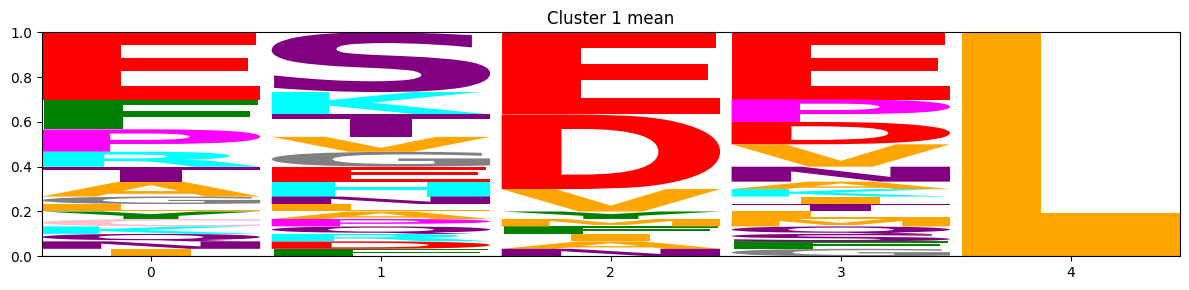

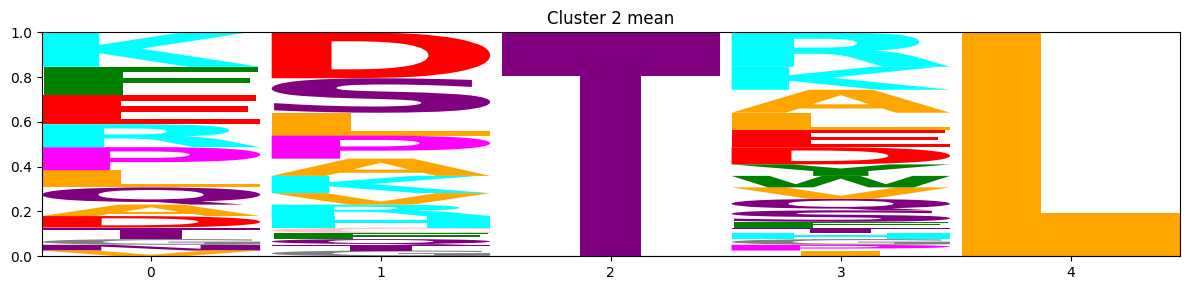

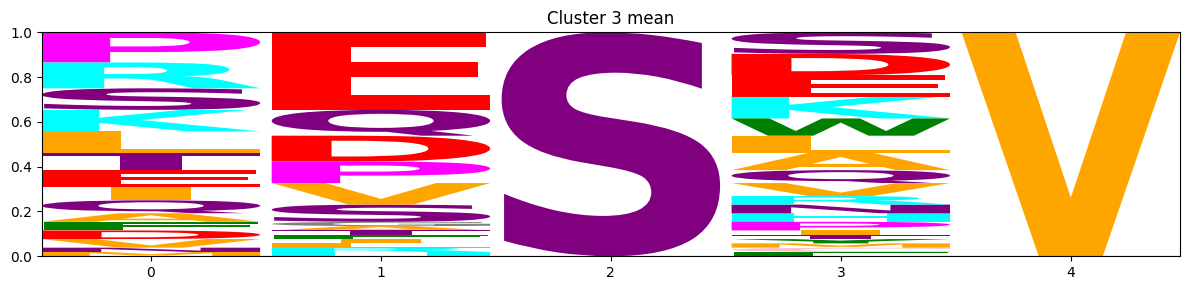

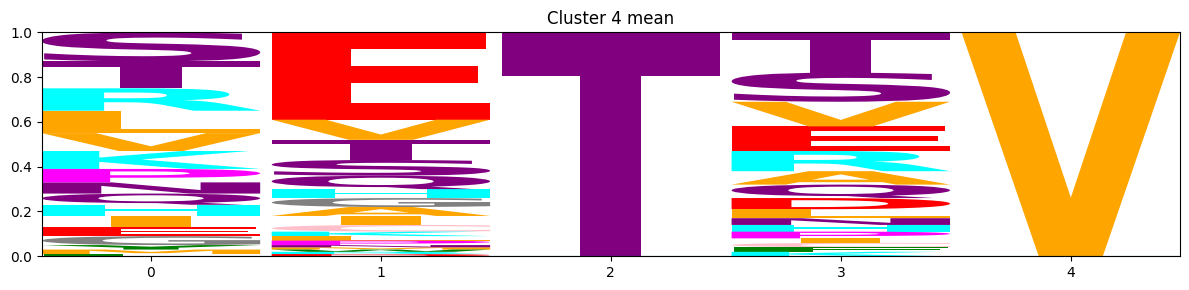

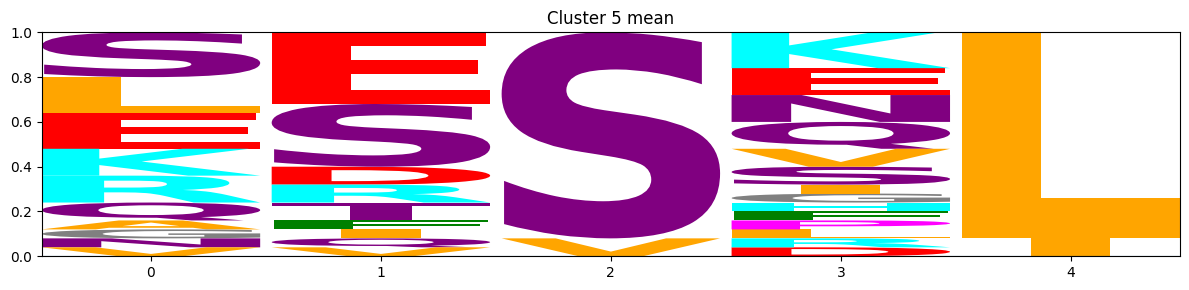

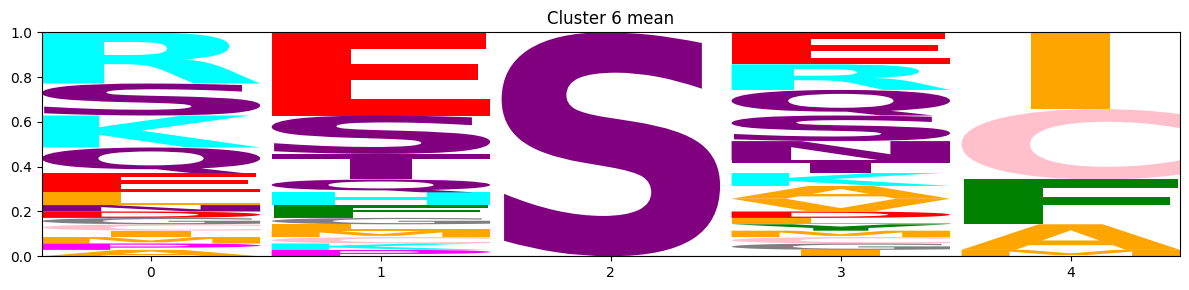

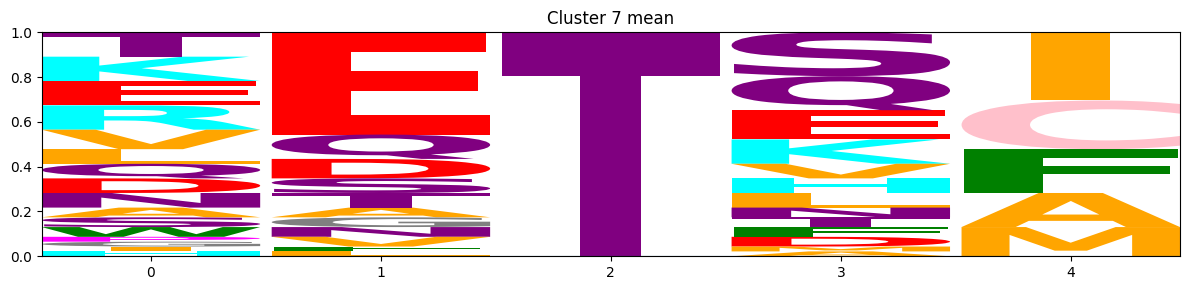

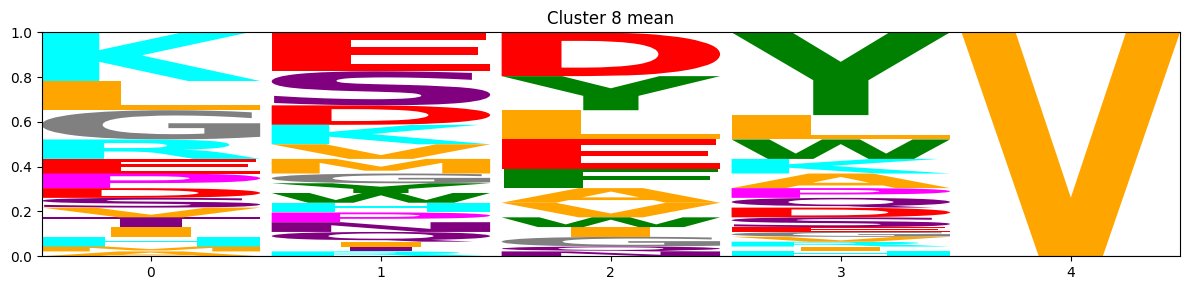

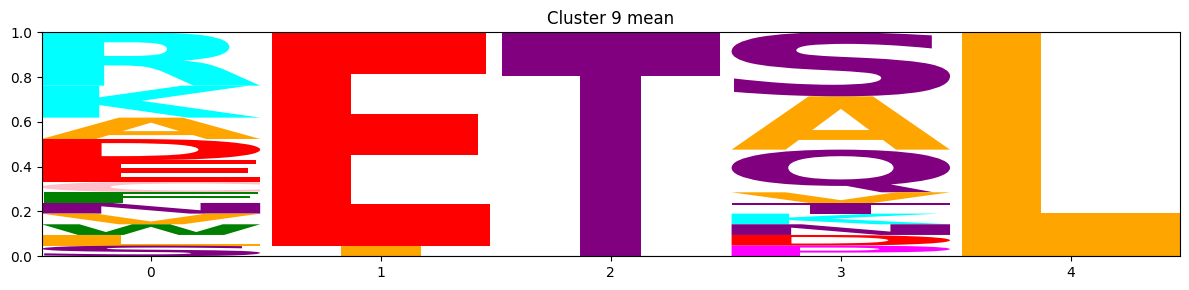

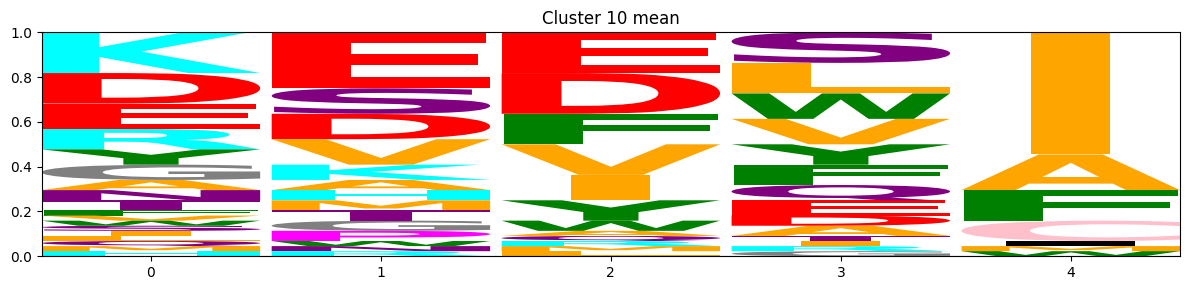

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logomaker as lm

data = np.load("cluster_means_normal_space.npz", allow_pickle=True)
means = data["means"]

# Ensure means is (n_features × k)
if means.ndim != 2:
    raise ValueError(f"Expected 2D means, got {means.shape}")
if means.shape[0] <= 32 and means.shape[1] > means.shape[0]:
    means = means.T

n_features, k = means.shape

alphabet = list("ACDEFGHIKLMNPQRSTVWY-")
n_symbols = len(alphabet)

if n_features % n_symbols != 0:
    raise ValueError(f"n_features={n_features} not divisible by n_symbols={n_symbols}")

L = n_features // n_symbols

color_dict = {
    'A': "orange", 'V': "orange", 'L': "orange", 'I': "orange", 'M': "orange",
    'F': "green",  'Y': "green",  'W': "green",
    'H': "cyan",   'K': "cyan",   'R': "cyan",
    'D': "red",    'E': "red",
    'S': "purple", 'T': "purple", 'N': "purple", 'Q': "purple",
    'C': "pink",   'G': "gray",   'P': "magenta",
    '-': "black"
}

def plot_logo_from_mean(mean_vec, title, topn=None):
    # IMPORTANT: order="F" to match Julia (column-major)
    M = mean_vec.reshape((n_symbols, L), order="F")

    # sanity check: per-position sums should be ~1 for true one-hot means
    col_sums = M.sum(axis=0)

    # optional sparsify (topn per position)
    if topn is not None:
        Ms = np.zeros_like(M)
        for j in range(M.shape[1]):
            col = M[:, j]
            idx = np.argsort(np.abs(col))[::-1][:topn]
            Ms[idx, j] = col[idx]
        M = Ms

    df = pd.DataFrame(M.T, columns=alphabet)

    fig, ax = plt.subplots(figsize=(12, 3))
    logo = lm.Logo(df, ax=ax)
    logo.style_glyphs(color_scheme=color_dict)
    ax.axhline(0, linewidth=0.8)
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

TOPN = None  # set 4 if you want sparsified display
for c in range(min(k, 16)):
    plot_logo_from_mean(means[:, c], f"Cluster {c+1} mean", topn=TOPN)


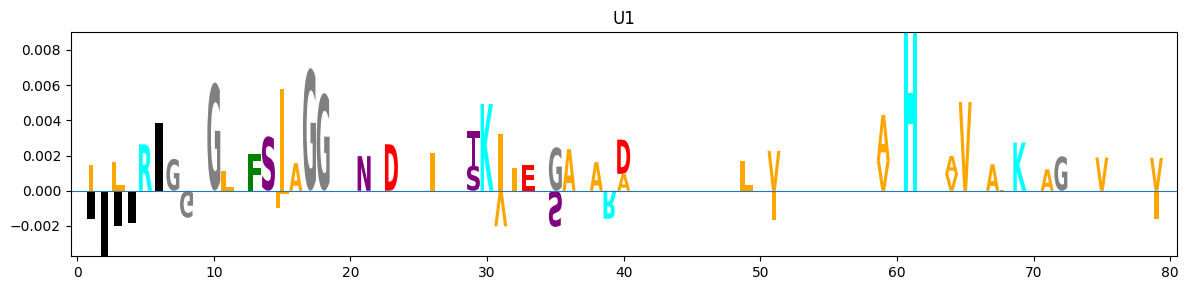

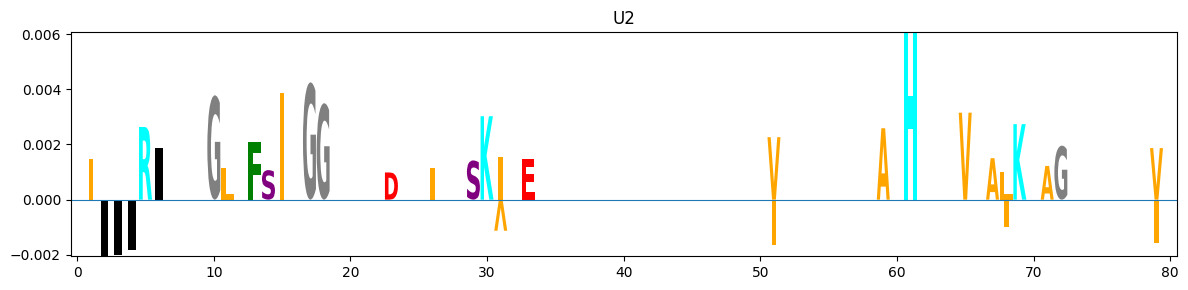

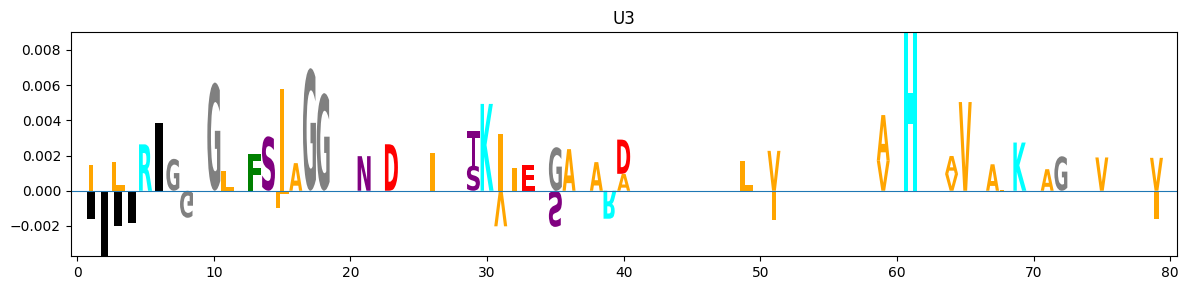

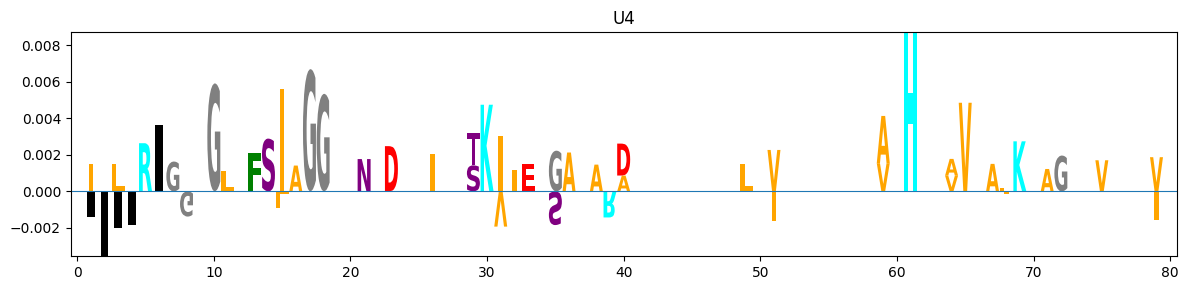

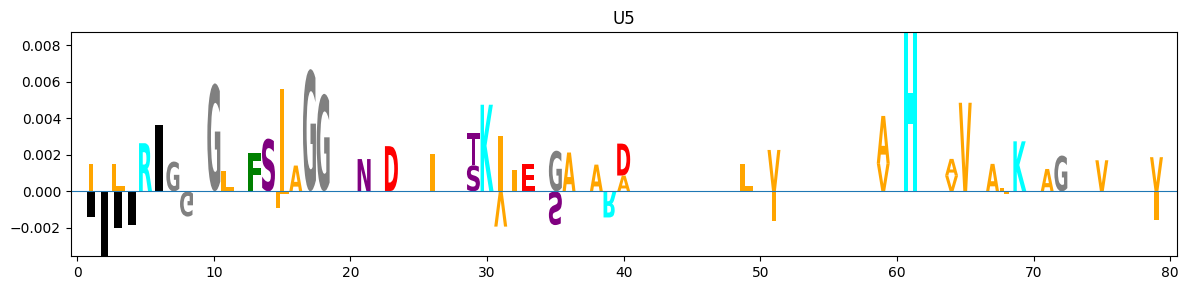

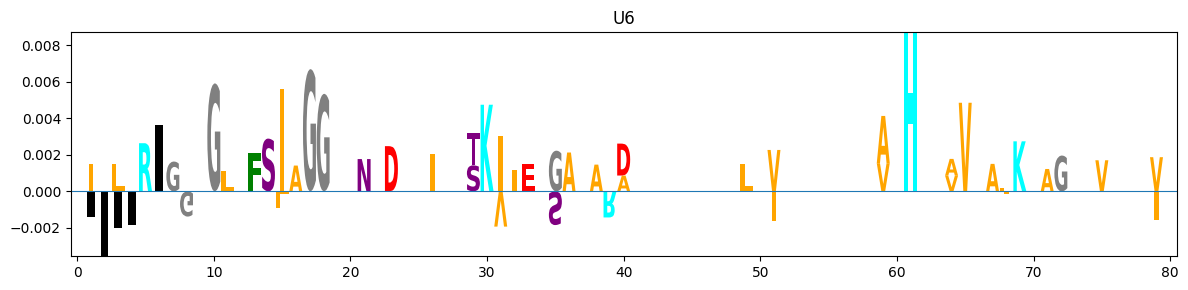

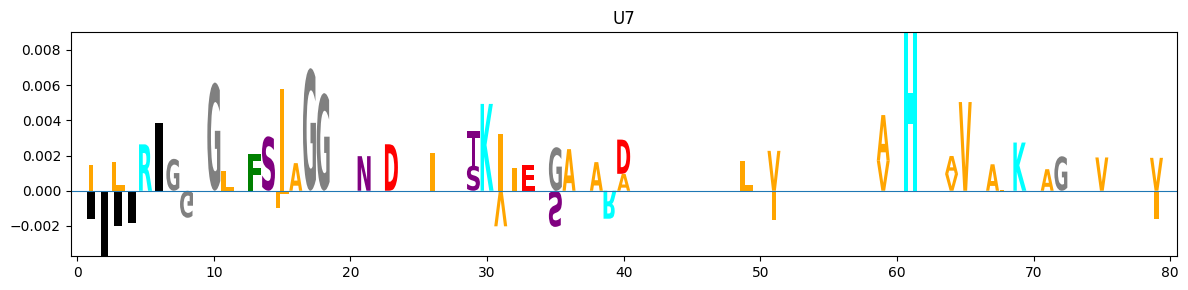

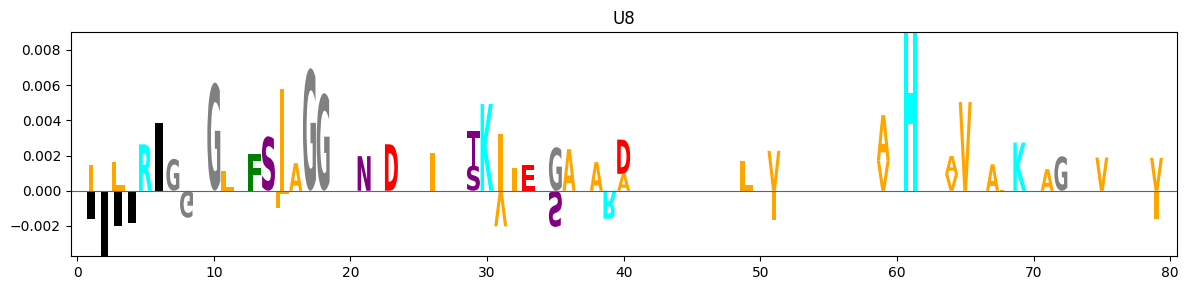

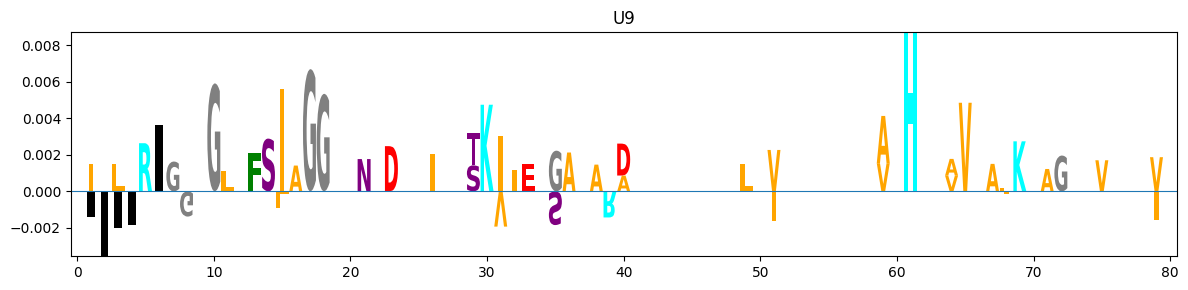

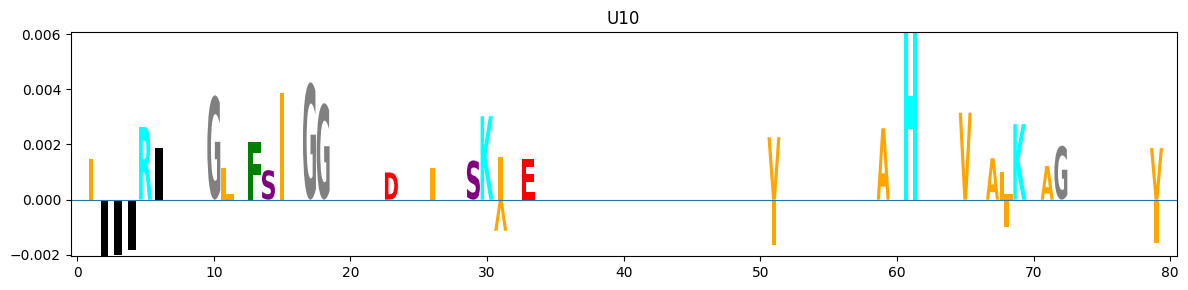

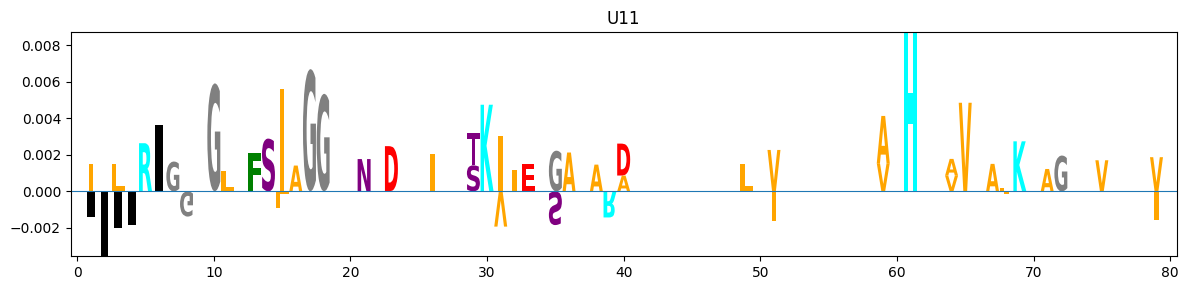

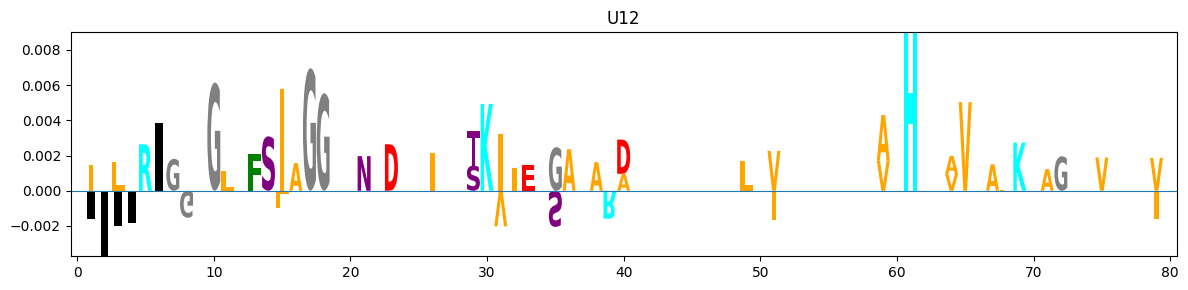

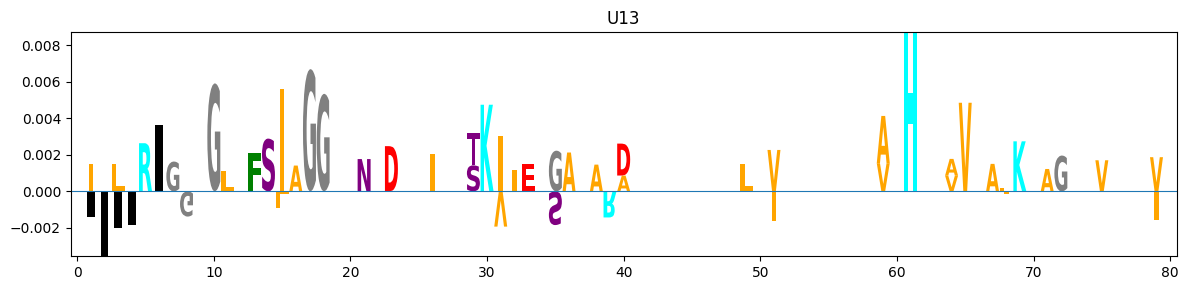

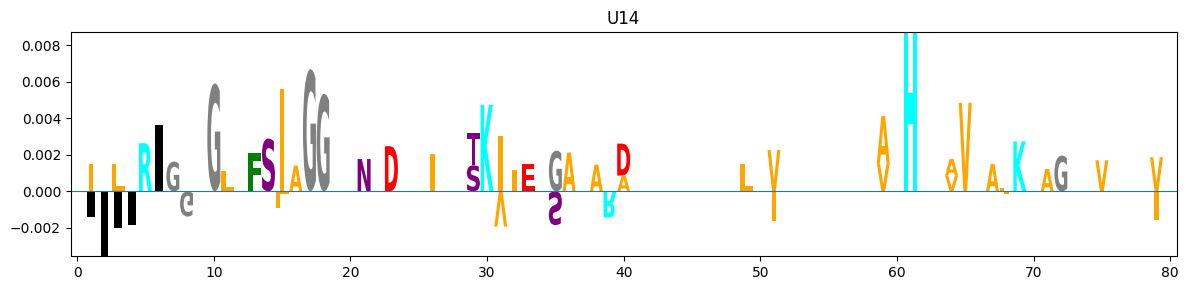

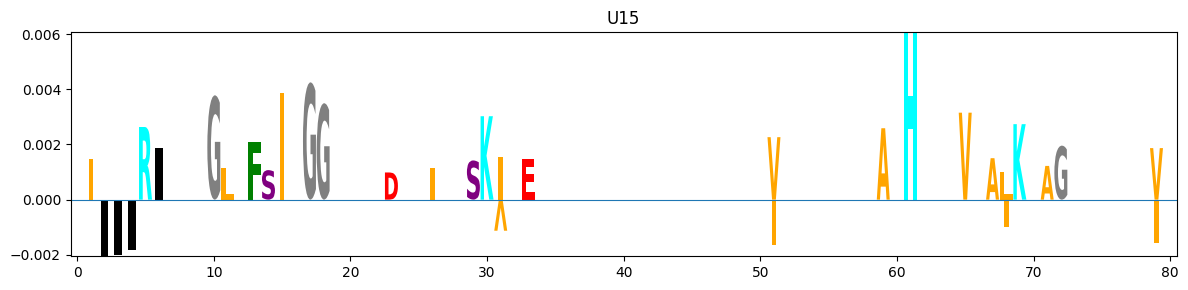

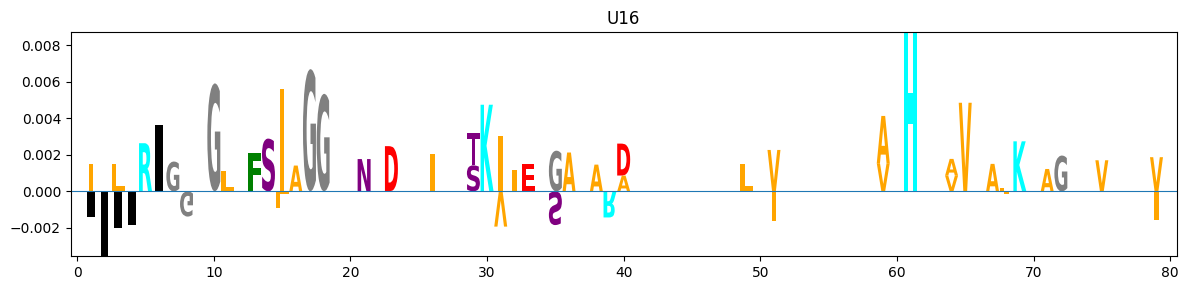

Now plotting orthogonalized versions:


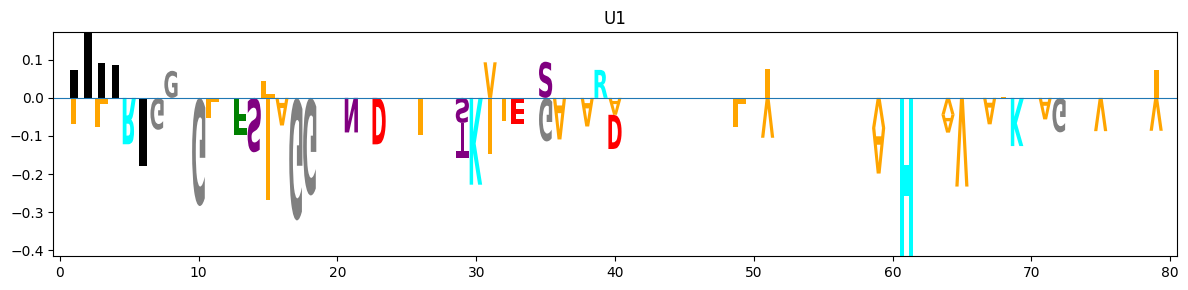

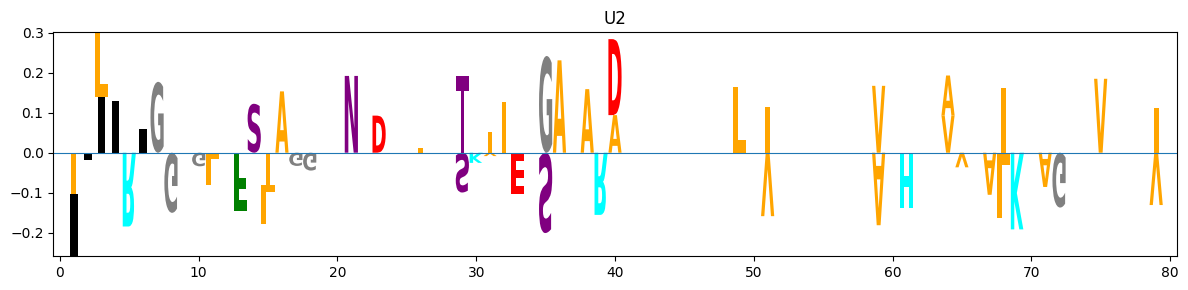

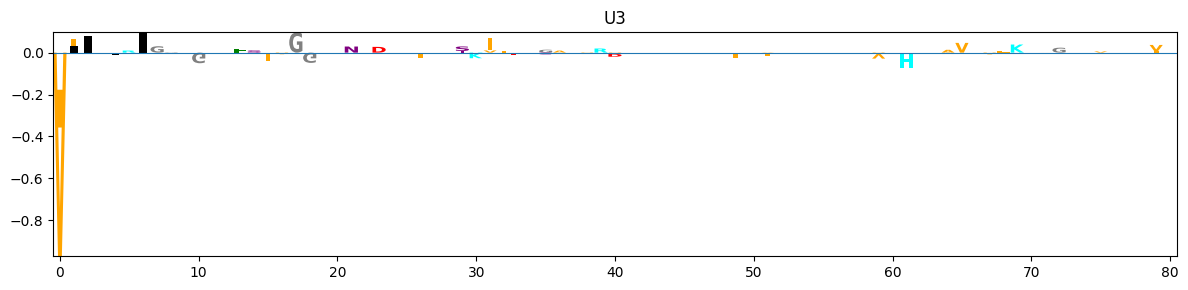

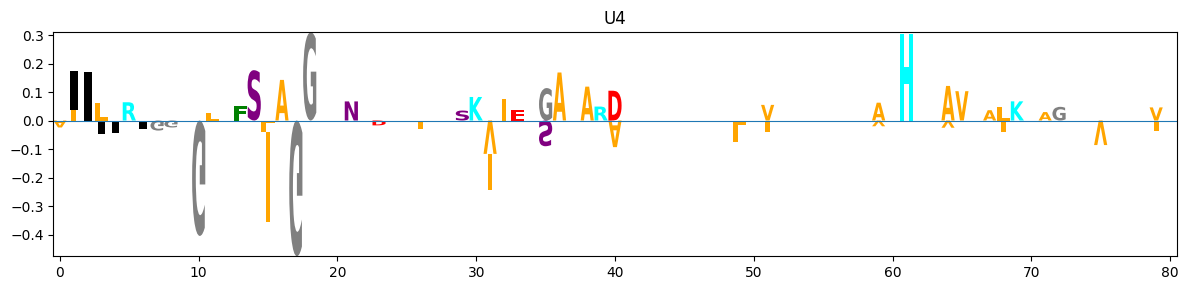

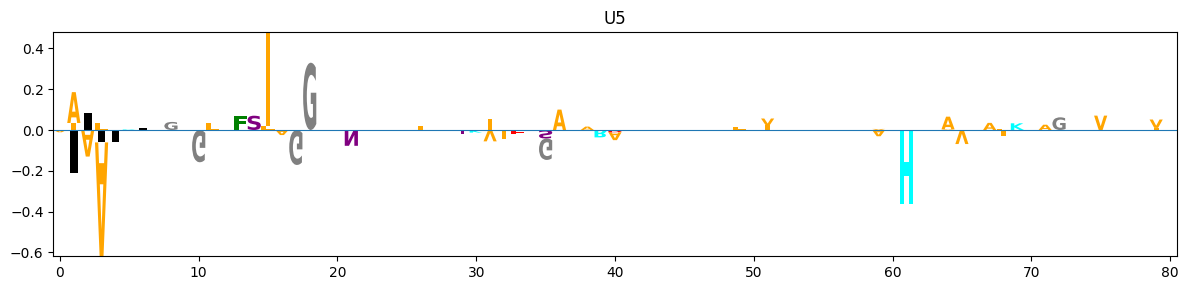

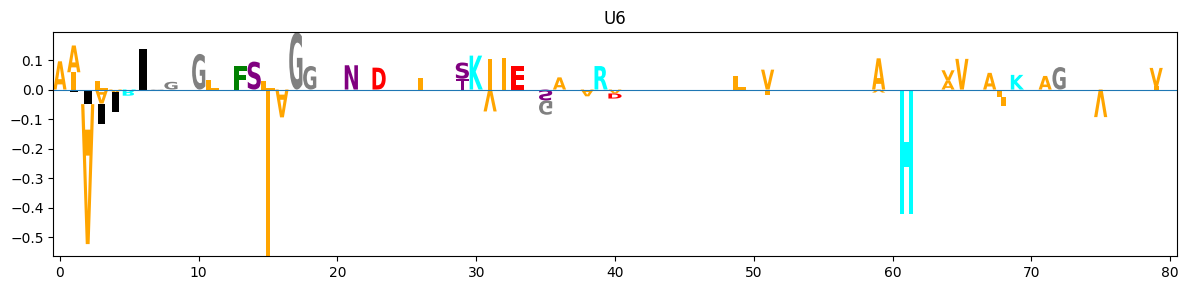

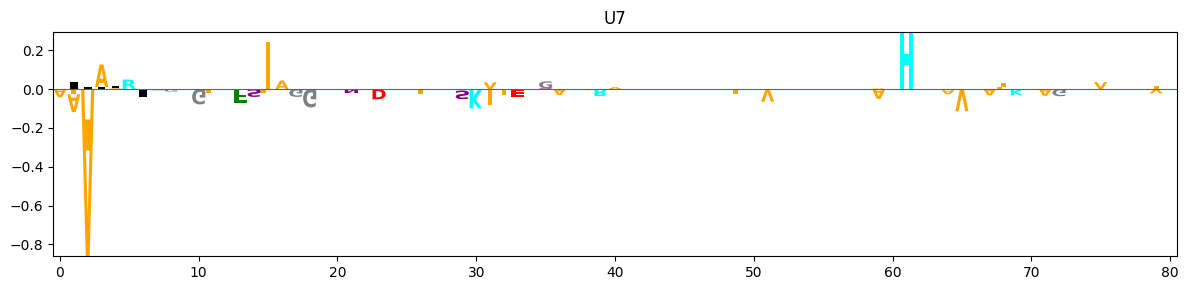

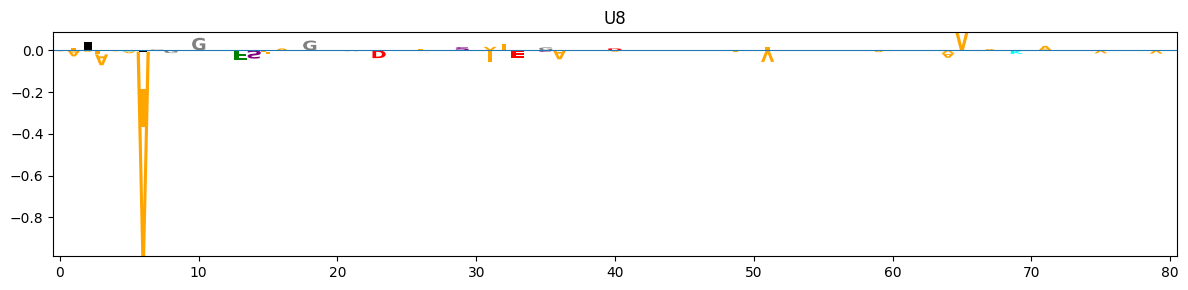

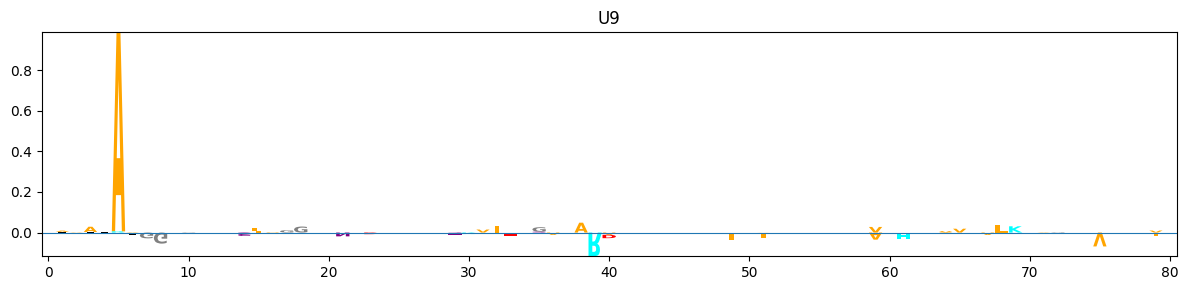

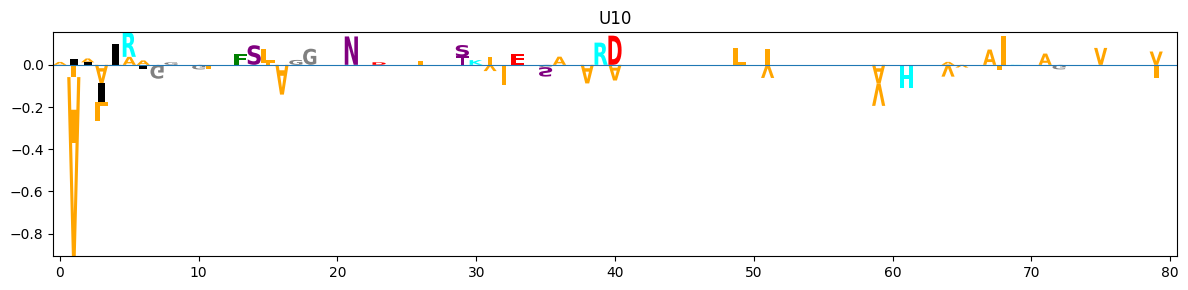

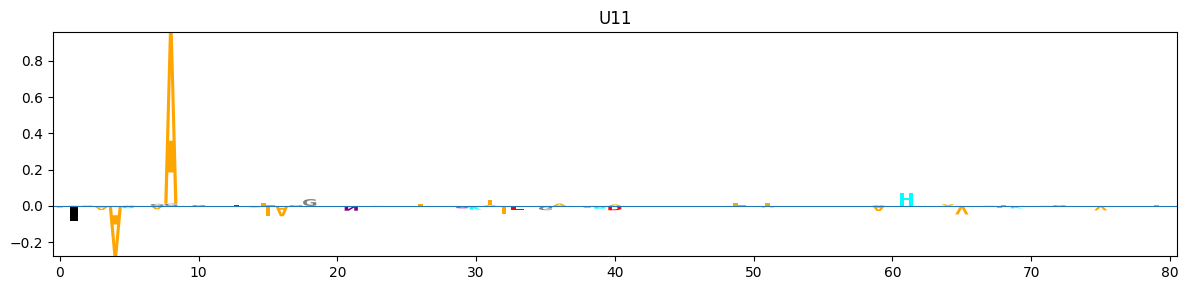

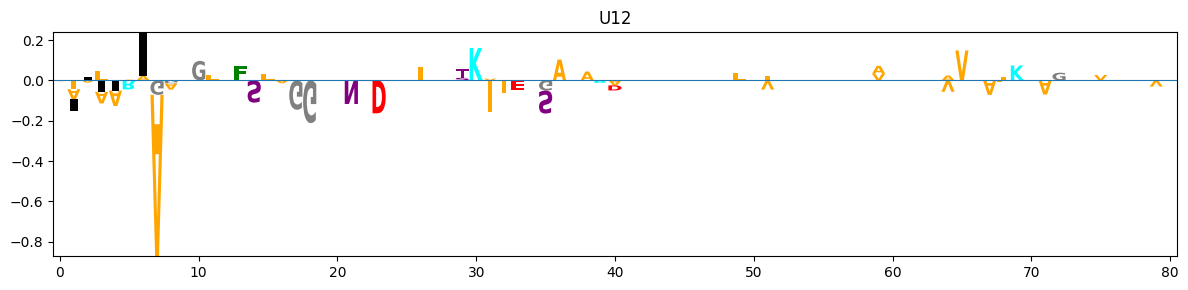

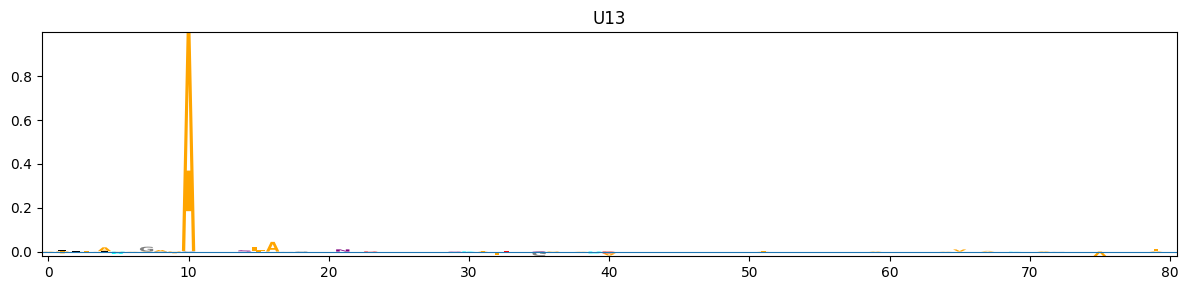

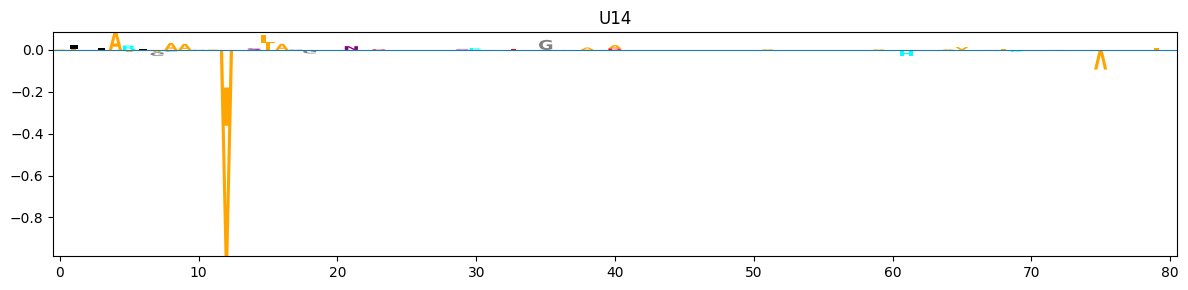

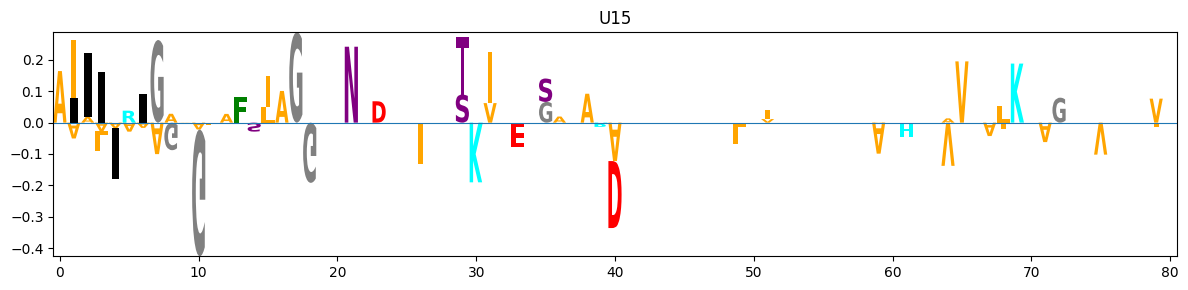

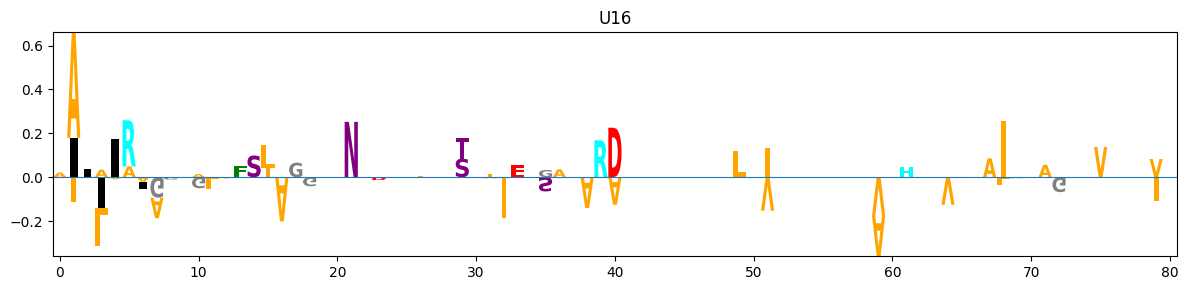

In [36]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logomaker as lm

data = np.load("U_cols_theory.npz", allow_pickle=True)

# --- load all U's present: U1, U2, ..., Uk (numeric sort) ---
u_keys = [k for k in data.files if re.fullmatch(r"U\d+", k)]
u_keys.sort(key=lambda s: int(s[1:]))  # sort by the number after 'U'

U = [data[k] for k in u_keys]
S = data["S"] if "S" in data.files else None
import numpy as np

def orthogonalize_U_list(U_list, mode="qr", normalize=True, eps=1e-12):
    """
    Orthogonalize a list of 2D arrays (e.g. each is 21xL) by flattening each to a vector.

    Returns:
      U_orth: list of same-shaped arrays, now mutually orthogonal (or orthonormal if normalize=True)
      R: the upper-triangular factor (useful for diagnostics)
    """
    shapes = [u.shape for u in U_list]
    if len(set(shapes)) != 1:
        raise ValueError(f"All U arrays must have the same shape; got shapes={shapes}")

    m, n = shapes[0]
    k = len(U_list)

    # Stack flattened U's as columns: X has shape (21*L, k)
    X = np.column_stack([u.reshape(-1) for u in U_list])

    if mode == "qr":
        # QR gives orthonormal columns in Q (up to numerical rank issues)
        Q, R = np.linalg.qr(X, mode="reduced")

        # If you want orthogonal but not necessarily unit-norm, you can undo normalization:
        # but usually "orthonormal" is what people want, so default normalize=True.
        if not normalize:
            # Make columns orthogonal but keep original norms approximately
            norms = np.linalg.norm(X, axis=0)
            Q = Q * norms

        X_orth = Q

    elif mode == "gs":  # explicit modified Gram–Schmidt (more control)
        V = X.copy()
        Q = np.zeros_like(V)
        R = np.zeros((k, k), dtype=V.dtype)

        for j in range(k):
            v = V[:, j]
            for i in range(j):
                R[i, j] = np.dot(Q[:, i], v)
                v = v - R[i, j] * Q[:, i]
            R[j, j] = np.linalg.norm(v)
            if R[j, j] < eps:
                raise ValueError(f"Vector {j} is (numerically) dependent on previous ones; norm={R[j,j]}")
            Q[:, j] = v / R[j, j] if normalize else v

        X_orth = Q
    else:
        raise ValueError("mode must be 'qr' or 'gs'")

    # Reshape back to list of 21xL matrices
    U_orth = [X_orth[:, j].reshape(m, n) for j in range(k)]
    return U_orth, R


# ---- use it here ----
U_orth, R = orthogonalize_U_list(U, mode="qr", normalize=True)


alphabet = list("ACDEFGHIKLMNPQRSTVWY-")  # must match your encoding order

color_dict = {
    'A': "orange", 'V': "orange", 'L': "orange", 'I': "orange", 'M': "orange",
    'F': "green",  'Y': "green",  'W': "green",
    'H': "cyan",   'K': "cyan",   'R': "cyan",
    'D': "red",    'E': "red",
    'S': "purple", 'T': "purple", 'N': "purple", 'Q': "purple",
    'C': "pink",   'G': "gray",   'P': "magenta",
    '-': "black"
}

def sparsify_topn(M, topn=4):
    Ms = np.zeros_like(M)
    for j in range(M.shape[1]):
        col = M[:, j]
        idx = np.argsort(np.abs(col))[::-1][:topn]
        Ms[idx, j] = col[idx]
    return Ms

def plot_one_logo(mat_21xL, title, window=(0, 200), topn=4):
    M = np.array(mat_21xL, copy=True)

    if window is not None:
        start, end = window
        start = max(0, int(start))
        end = min(M.shape[1], int(end))
        M = M[:, start:end]

    if topn is not None:
        M = sparsify_topn(M, topn=topn)

    df = pd.DataFrame(M.T, columns=alphabet)

    fig, ax = plt.subplots(figsize=(12, 3))
    logo = lm.Logo(df, ax=ax)
    logo.style_glyphs(color_scheme=color_dict)

    ax.axhline(0, linewidth=0.8)
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

WINDOW = (0, 200)
TOPN = 4

for idx, (key, mat) in enumerate(zip(u_keys, U)):
    # if S exists and is long enough, annotate; otherwise just plot key name
    if S is not None and idx < len(S):
        title = f"{key}  σ={S[idx]:.3g}"
    else:
        title = key
    plot_one_logo(mat, title, window=WINDOW, topn=TOPN)

print("Now plotting orthogonalized versions:")
print("======================================================")
for idx, (key, mat) in enumerate(zip(u_keys, U_orth)):
    # if S exists and is long enough, annotate; otherwise just plot key name
    if S is not None and idx < len(S):
        title = f"{key}  σ={S[idx]:.3g}"
    else:
        title = key
    plot_one_logo(mat, title, window=WINDOW, topn=TOPN)
